# Recommender Systems with Python

In this exercise we will make a basic recommendation systems using Python and pandas. The goal is to recommend movies that are most similar to a particular movie. This is not a robust recommendation system. This system will just tell us what movies are the most similar to your movie choice.


In the next exercise, we are going to build a more complex Recommender System. We will cover different techniques like

`"Collaborative Filtering and Content-Based Filtering"`

___
# Your Job 
___

***Things to do***
- Perform the data pre-processing.
- Perform EDA
- Create a Movie Matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. (Hint: Pivot_table)

Note: there will be a lot of NaN values, because most people have not seen most of the movies.

- (Step 4) Now, select any of the two, three or any number of movies and grab the user ratings for those two movies.
- (Step 5) Now you have to calculate corelation of these movies separately with the Movie matrix that you created above. 
- (Step 6) Make a dataframe containing the `Movies_names , corelation` and sort the dataframe by corelation. 
- Do Step 6 for each movie you selected in step 4.
- Join the `number of ratings` column, with the `corelation` table.

***What will be new***
- You will learn how to make a very basic Recommender system which will recommend movies similar to your movie choices.
 
***What will be tricky***
- Step 5 might be a bit tricky step, what you can do is, you can use [corrwith()](https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/#:~:text=Pandas%20dataframe.,will%20be%20a%20NaN%20value.) method to get correlations between two pandas series.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
movies = pd.read_csv('Movie_data.csv')

In [29]:
movies.head()

,Unnamed: 0,user_id,item_id,rating,timestamp,title
0,0,0,50,5,881250949,Star Wars (1977)
1,1,290,50,5,880473582,Star Wars (1977)
2,2,79,50,4,891271545,Star Wars (1977)
3,3,2,50,5,888552084,Star Wars (1977)
4,4,8,50,5,879362124,Star Wars (1977)


In [30]:
movies.describe()

,Unnamed: 0,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,50001.000000,462.470876,425.520914,3.529864,8.835288e+08
std,28868.523822,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,0.000000,1.000000,1.000000,8.747247e+08
25%,25000.500000,254.000000,175.000000,3.000000,8.794487e+08
50%,50001.000000,447.000000,322.000000,4.000000,8.828269e+08
75%,75001.500000,682.000000,631.000000,4.000000,8.882600e+08
max,100002.000000,943.000000,1682.000000,5.000000,8.932866e+08


In [31]:
movies.isnull().sum()

Unnamed: 0    0
user_id       0
item_id       0
rating        0
timestamp     0
title         0
dtype: int64

In [32]:
movies['title'].nunique()

1664

In [33]:
movies['user_id'].nunique()

944

# EDA

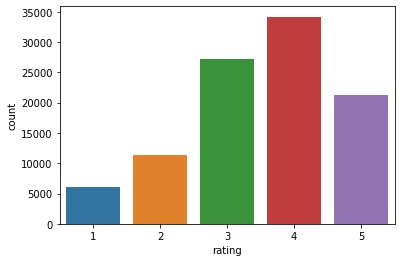

In [34]:
# count of ratings
sns.countplot(x = 'rating', data=movies)


[[]]

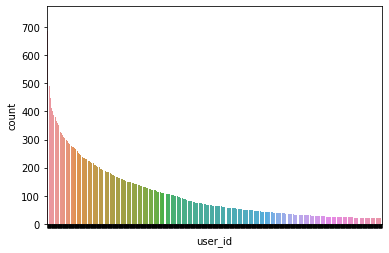

In [35]:
# distribution of users contributions
ax = sns.countplot(x = 'user_id', data=movies,  order = movies['user_id'].value_counts().index)
ax.set(xticklabels=[])

[[]]

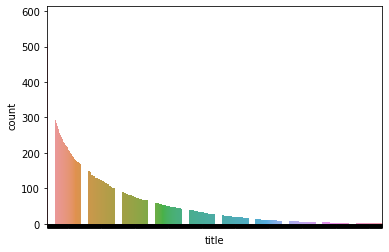

In [36]:
# distribution of movies apparition
ax = sns.countplot(x = 'title', data=movies,  order = movies['title'].value_counts().index)
ax.set(xticklabels=[])

In [37]:
movies['timestamp']  = pd.to_datetime(movies['timestamp'] ,unit='s')
movies['timestamp'] = pd.to_datetime(movies['timestamp'].dt.strftime('%Y-%m-%d'))


In [38]:
movies['year']= movies['title'].str.split().str[-1].str.strip('()')


In [48]:
movies

,Unnamed: 0,user_id,item_id,rating,timestamp,title,year
0,0,0,50,5,1997-12-04,Star Wars (1977),1977
1,1,290,50,5,1997-11-25,Star Wars (1977),1977
2,2,79,50,4,1998-03-30,Star Wars (1977),1977
3,3,2,50,5,1998-02-27,Star Wars (1977),1977
4,4,8,50,5,1997-11-12,Star Wars (1977),1977
...,...,...,...,...,...,...,...
99998,99998,840,1674,4,1998-03-29,Mamma Roma (1962),1962
99999,99999,655,1640,3,1998-02-26,"Eighth Day, The (1996)",1996
100000,100000,655,1637,3,1998-03-04,Girls Town (1996),1996
100001,100001,655,1630,3,1998-02-14,"Silence of the Palace, The (Saimt el Qusur) (1...",1994


[Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '1977'),
 Text(0, 0, '

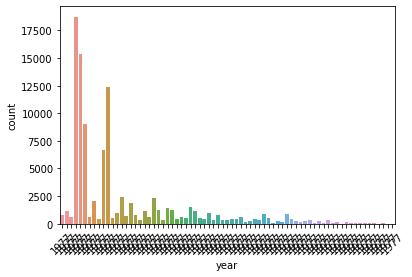

In [49]:
# distribution of movies apparition
xticklabels = movies['year']

ax = sns.countplot(x = 'year', data=movies)
ax.set_xticklabels(xticklabels,rotation = 45)

# Create a Movie Matrix that has the user ids on one axis and the movie title on another axis

In [182]:
movies = pd.read_csv('Movie_data.csv')
df = pd.pivot_table(movies, values = 'rating', columns = 'title', index = 'user_id' )

In [183]:
df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
Avg_rating['Avg Rating'] = pd.DataFrame(movies.groupby('title')['rating'].mean())
Tot_rating['Tot Rating'] = pd.DataFrame(movies.groupby('title')['rating'].count())

In [187]:

my_movie = df.iloc[:,3]


recommendation = df.corrwith(my_movie, axis = 0)
recommendation = pd.DataFrame(recommendation, columns=['score'])

recommendation= recommendation.join(Avg_rating['Avg Rating'])
recommendation= recommendation.join(Tot_rating['Tot Rating'])

recommendation.sort_values(by = 'score',ascending = False, inplace=True)

# Minimum rating: 2
recommendation = recommendation[recommendation['Avg Rating']>2]

# Minimum number of Ratings: 50
recommendation = recommendation[recommendation['Tot Rating']>50]

recommendation.head(15)

C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,score,Avg Rating,Tot Rating
title,,,
12 Angry Men (1957),1.000000,4.344000,125
Addicted to Love (1997),0.867722,3.166667,54
Last Man Standing (1996),0.657596,2.660377,53
Bob Roberts (1992),0.624499,3.741176,85
Ulee's Gold (1997),0.619544,3.760870,184
McHale's Navy (1997),0.612372,2.188406,69
Rear Window (1954),0.570513,4.387560,209
Seven Years in Tibet (1997),0.549939,3.458065,155
Clerks (1994),0.528173,3.804054,148


In [188]:
my_movie = df.iloc[:,225]

recommendation = df.corrwith(my_movie, axis = 0)
recommendation = pd.DataFrame(recommendation, columns=['score'])

recommendation= recommendation.join(Avg_rating['Avg Rating'])
recommendation= recommendation.join(Tot_rating['Tot Rating'])

recommendation.sort_values(by = 'score',ascending = False, inplace=True)

# Minimum rating: 2
recommendation = recommendation[recommendation['Avg Rating']>2]

# Minimum number of Ratings: 50
recommendation = recommendation[recommendation['Tot Rating']>50]

recommendation.head(15)

C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,score,Avg Rating,Tot Rating
title,,,
Braveheart (1995),1.000000,4.151515,297
Anastasia (1997),0.717137,3.424242,66
Kull the Conqueror (1997),0.591793,2.637681,69
Around the World in 80 Days (1956),0.585614,3.661017,59
"Peacemaker, The (1997)",0.554733,3.272059,136
Things to Do in Denver when You're Dead (1995),0.521470,3.154930,71
French Kiss (1995),0.518230,3.333333,84
G.I. Jane (1997),0.510298,3.360000,175
"Ghost and the Darkness, The (1996)",0.505614,3.203125,128


In [189]:
my_movie = df.iloc[:,654]

recommendation = df.corrwith(my_movie, axis = 0)
recommendation = pd.DataFrame(recommendation, columns=['score'])

recommendation= recommendation.join(Avg_rating['Avg Rating'])
recommendation= recommendation.join(Tot_rating['Tot Rating'])

recommendation.sort_values(by = 'score',ascending = False, inplace=True)

# Minimum rating: 2
recommendation = recommendation[recommendation['Avg Rating']>2]

# Minimum number of Ratings: 50
recommendation = recommendation[recommendation['Tot Rating']>50]

recommendation.head(15)

C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\delchain_default\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,score,Avg Rating,Tot Rating
title,,,
"Piano, The (1993)",1.0,3.601190,168
Casino (1995),1.0,3.648352,91
George of the Jungle (1997),1.0,2.685185,162
"Hunt for Red October, The (1990)",1.0,3.863436,227
Star Trek VI: The Undiscovered Country (1991),1.0,3.279503,161
Chain Reaction (1996),1.0,2.700000,80
"Apartment, The (1960)",1.0,3.936508,63
Evil Dead II (1987),1.0,3.516854,89
Gandhi (1982),1.0,4.020513,195
